In [ ]:
!pip install openai

In [28]:
from openai import OpenAI
api_key_string = 

client = OpenAI(api_key=api_key_string)

file_path = "/Users/kaniska/Downloads/autistic_sound2.wav"

audio_file= open(file_path, "rb")

transcription = client.audio.transcriptions.create(
  model="whisper-1", 
  file=audio_file
)
print(transcription.text)


I want a snack. I want to play. I am running. I want a toy. Take me to Wal-Mart. I want burger. Burger. Give me. Give me. Now. Now.


In [ ]:
!pip install librosa

In [ ]:
!pip install matplotlib

In [33]:
import librosa

audio_path = "/Users/kaniska/Downloads/autistic_sound2.wav"
waveform, sample_rate = librosa.load(audio_path, sr=None) 

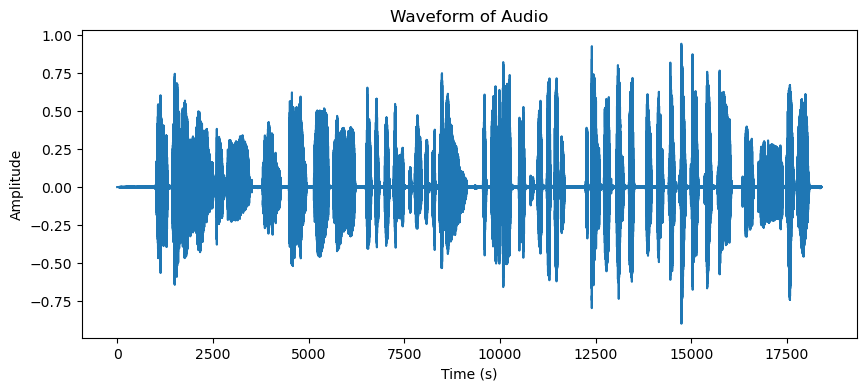

In [34]:
import matplotlib.pyplot as plt

time_axis = librosa.times_like(waveform, sr=sample_rate)

plt.figure(figsize=(10, 4))
plt.plot(time_axis, waveform)
plt.title('Waveform of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [63]:
content_prompt = "Extract keywords from this text:\n\n"+str(transcription.text)

response = client.chat.completions.create(
  model="gpt-3.5-turbo-0125",
  response_format={"type":"json_object"},
  messages=[
    {"role": "system", "content": "You are a helpful assistant designed to output JSON."},
    {"role": "user", "content": content_prompt}
  ]
)

print(response.choices[0].message.content)

{
    "keywords": [
        "snack",
        "play",
        "running",
        "toy",
        "Wal-Mart",
        "burger"
    ]
}


In [81]:
content_prompt = f"Please analyze the sentiment of the following text:{transcription.text}"

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with a text, and your task is to classify its sentiment as positive, neutral, or negative."
    },
    {
      "role": "user",
      "content": content_prompt
    }
  ],
  temperature=0.7,
  max_tokens=64,
  top_p=1
)

#sentiment = response.choices[0].content.strip().lower()

print(response)

ChatCompletion(id='chatcmpl-95nybTF86ZGgz2Xl6AGapxO1jqy7X', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The sentiment of the text is neutral.', role='assistant', function_call=None, tool_calls=None))], created=1711170777, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint='fp_3bc1b5746c', usage=CompletionUsage(completion_tokens=8, prompt_tokens=84, total_tokens=92))


In [ ]:
!pip install -U openai-whisper

In [ ]:
import whisper
options = whisper.DecodingOptions(language= 'en', fp16=False)
model = whisper.load_model('meduim', ) 
target_language = "hindi"
#content_prompt = f"Translate the following text into {target_language}: {transcription.text}\n",

translation = model.translate(transcription, target_language)
print(translation)

In [95]:
content_prompt = f"{transcription.text}"

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with a text, and your task is to translate the text into Hindi."
    },
    {
      "role": "user",
      "content": content_prompt
    }
  ],
  temperature=0.7,
  max_tokens=64,
  top_p=1
)

#translated_text = response.choices[0].content.strip().lower()

print(response)

ChatCompletion(id='chatcmpl-95oMxw5mAhiJN1cW00jHsauc1Q3Ag', choices=[Choice(finish_reason='length', index=0, logprobs=None, message=ChatCompletionMessage(content='मुझे एक नाश्ता चाहिए। मुझे खेलना है। मैं दौड़ रहा हूँ। मु', role='assistant', function_call=None, tool_calls=None))], created=1711172287, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint='fp_3bc1b5746c', usage=CompletionUsage(completion_tokens=64, prompt_tokens=71, total_tokens=135))
